In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#this will allow the plot to be inline in the browser
%matplotlib inline
import os
# credit: Jed Collins

QUESTION 1

In [2]:
number_stations = {} # Create an empty dictionary to hold results
path = r'SubwayData/'
for file in os.listdir('SubwayData'): # Iterate through pajek files in folder
    if file.endswith(".net"):
        #print(file)
        g = nx.read_pajek(path+file) # read pajek as network
        Gcc = sorted(nx.connected_components(g), key=len, reverse=True) # identify largest connected component of the network
        G = g.subgraph(Gcc[0])
        number_stations[file] = len(G.nodes()) # identify number of nodes in largest connected component, and append to dictionary

In [3]:
number_stations

{'Barcelona.net': 128,
 'Moscow.net': 134,
 'Chicago.net': 141,
 'Berlin.net': 170,
 'Seoul.net': 392,
 'Shanghai.net': 148,
 'Paris.net': 299,
 'Beijing.net': 104,
 'London.net': 266,
 'Osaka.net': 108,
 'Madrid.net': 209,
 'Mexico.net': 147,
 'HongKong.net': 82,
 'Tokyo.net': 217,
 'NewYork.net': 433}

In [4]:
# Identify cities with min and max number of stations(nodes), and print their names and number of stations(nodes).
print('The city with the MINIMUM number of stations in its largest connected component = ', list(number_stations.keys())[list(number_stations.values()).index(min(number_stations.values()))], 'with', min(number_stations.values()), 'total stations.')
print('The city with the MAXIMUM number of stations in its largest connected component = ', list(number_stations.keys())[list(number_stations.values()).index(max(number_stations.values()))], 'with', max(number_stations.values()), 'total stations.')

The city with the MINIMUM number of stations in its largest connected component =  HongKong.net with 82 total stations.
The city with the MAXIMUM number of stations in its largest connected component =  NewYork.net with 433 total stations.


In [5]:
# Calculate Avg number of connections per station for HongKong's largest connected component
h = nx.read_pajek(path+'HongKong.net')
Gcc = sorted(nx.connected_components(h), key=len, reverse=True) # identify largest connected component of the network
Hon = h.subgraph(Gcc[0])
print("Avg number of connections per station for HongKong's largest connected component =", 2.0*Hon.number_of_edges()/Hon.number_of_nodes())

Avg number of connections per station for HongKong's largest connected component = 2.073170731707317


In [6]:
#Calculate Avg number of connections per station for NewYork's largest connected component
n = nx.read_pajek(path+'NewYork.net')
Gcc = sorted(nx.connected_components(n), key=len, reverse=True)
NY = n.subgraph(Gcc[0])
print("Avg number of connections per station for NewYork's largest connected component =", 2.0*NY.number_of_edges()/NY.number_of_nodes())

Avg number of connections per station for NewYork's largest connected component = 2.1939953810623556


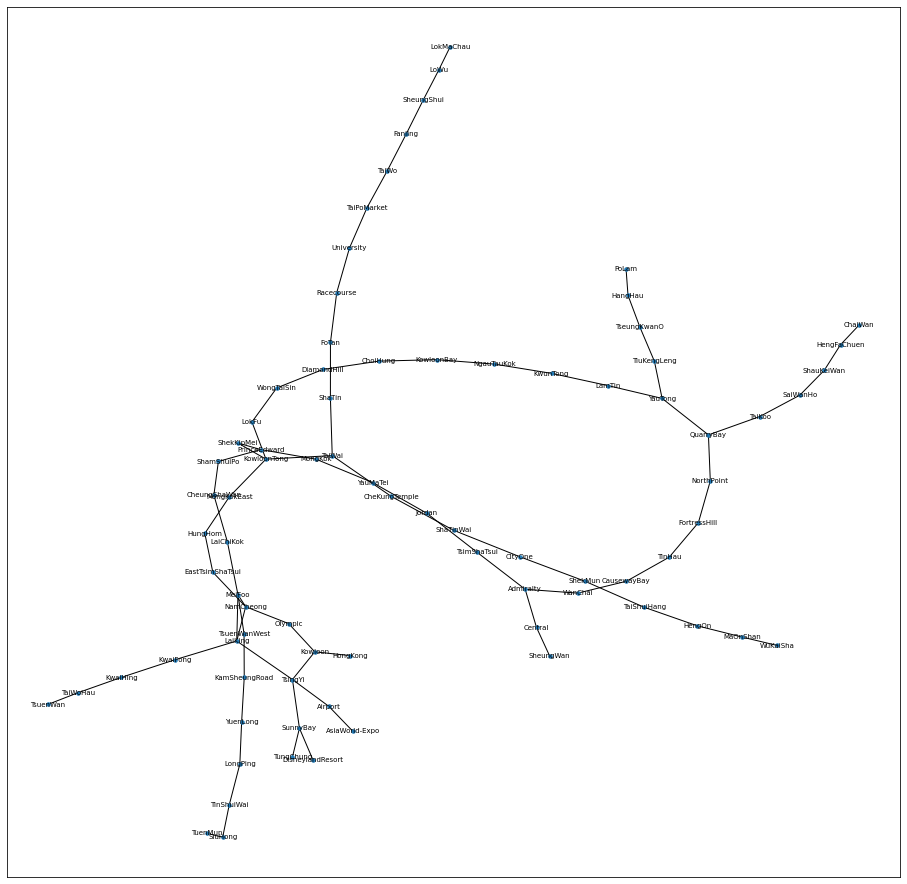

In [7]:
# Plot HongKong's largest connected component
plt.figure(1,figsize=(16,16)) 
nx.draw_networkx(Hon,node_size=12,font_size=7)

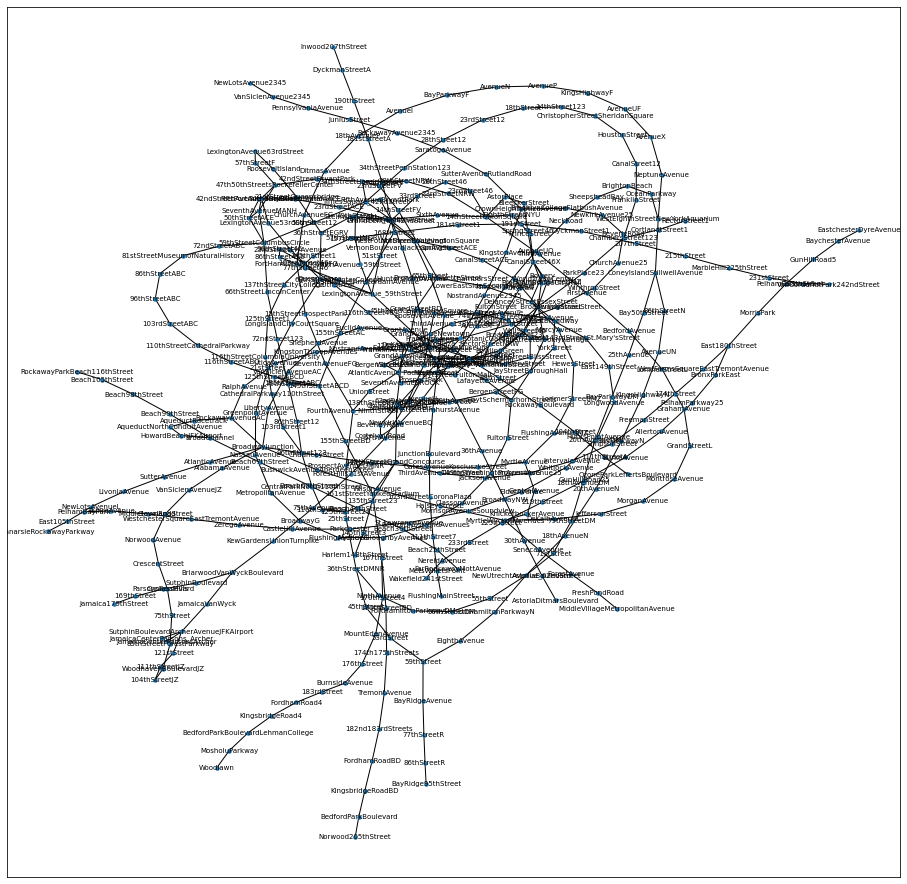

In [8]:
# Plot NewYork's largest connected component
plt.figure(1,figsize=(16,16)) 
nx.draw_networkx(NY,node_size=12,font_size=7)

QUESTION 2

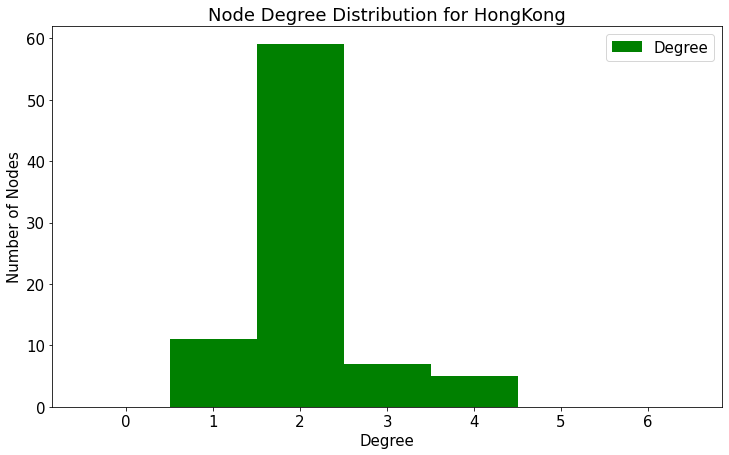

In [9]:
# Plot the Node Degree Distribution for Hong Kong
deg = list(dict(Hon.degree()).values())
hist, bins = np.histogram(deg, bins = range(0,8))
width = (bins[1] - bins[0]) 
center = (bins[:-1] + bins[1:]) / 2
plt.rc('font', size=15)

fig = plt.figure(figsize=(12,7))
plt.bar(bins[:-1], hist, width = width, color = 'g', label = 'Degree')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Node Degree Distribution for HongKong")
plt.show()

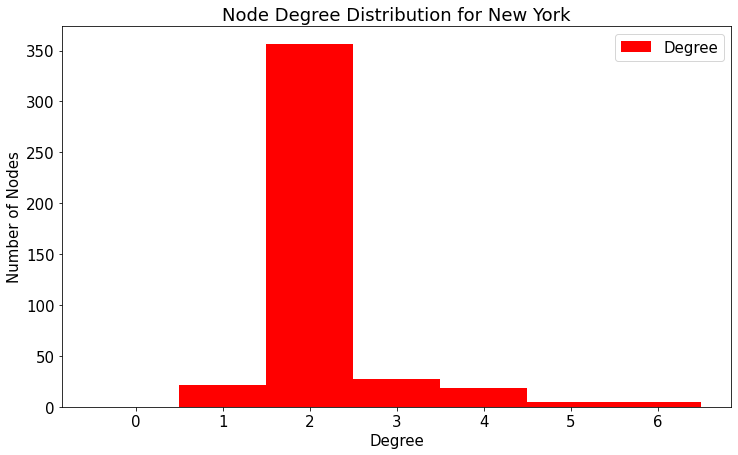

In [10]:
# Plot the Node Degree Distribution for New York
deg = list(dict(NY.degree()).values())
hist, bins = np.histogram(deg, bins = range(0,8))
width = (bins[1] - bins[0]) 
center = (bins[:-1] + bins[1:]) / 2
plt.rc('font', size=15)

fig = plt.figure(figsize=(12,7))
plt.bar(bins[:-1], hist, width = width, color = 'r', label = 'Degree')
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Node Degree Distribution for New York")
plt.show()

QUESTION 3

In [11]:
lengths = nx.shortest_path_length(NY)
st_length = {}
maxlength = 0
for key in lengths:
   ll = key
   i = max(ll[1].values())
   st_length[ll[0]] = i
   if i > maxlength:
      maxlength = i
   print("For Station ", ll[0]," the max length is ",i)
print("The maximun length in the New York network is ",maxlength)

For Station  FarRockawayMottAvenue  the max length is  59
For Station  Beach25thStreet  the max length is  58
For Station  Beach36thStreet  the max length is  57
For Station  Beach44thStreet  the max length is  56
For Station  Jamaica179thStreet  the max length is  49
For Station  Beach60thStreet  the max length is  55
For Station  169thStreet  the max length is  48
For Station  Beach67thStreet  the max length is  54
For Station  JamaicaCenterParsons_Archer  the max length is  48
For Station  JamaicaCenterParsonsArcher  the max length is  48
For Station  ParsonsBoulevard  the max length is  47
For Station  SutphinBoulevardArcherAvenueJFKAirport  the max length is  47
For Station  JamaicaVanWyck  the max length is  46
For Station  SutphinBoulevard  the max length is  46
For Station  Beach90thStreet  the max length is  54
For Station  BroadChannel  the max length is  53
For Station  Beach98thStreet  the max length is  55
For Station  BriarwoodVanWyckBoulevard  the max length is  45
For S

For Station  KosciuszkoStreet  the max length is  44
For Station  191stStreet  the max length is  44
For Station  UticaAvenue  the max length is  47
For Station  36thAvenue  the max length is  34
For Station  138thStreetGrandConcourse  the max length is  40
For Station  CrownHeightsUticaAvenue  the max length is  45
For Station  33rdStreetRawsonStreet  the max length is  33
For Station  MorganAvenue  the max length is  43
For Station  39thAvenue  the max length is  33
For Station  181stStreet1  the max length is  43
For Station  190thStreet  the max length is  45
For Station  MyrtleAvenue  the max length is  43
For Station  145thStreet3  the max length is  40
For Station  Harlem148thStreet  the max length is  41
For Station  QueensPlaza  the max length is  32
For Station  125thStreet456  the max length is  39
For Station  181stStreetA  the max length is  44
For Station  155thStreetBD  the max length is  40
For Station  168thStreet  the max length is  42
For Station  MontroseAvenue  the

For Station  34thStreetPennStationACE  the max length is  33
For Station  GrandStreetBD  the max length is  37
For Station  Bowery  the max length is  39
For Station  ProspectAvenueDMNR  the max length is  42
For Station  BayParkwayDM  the max length is  54
For Station  FortHamiltonParkwayDM  the max length is  46
For Station  NinthAvenue  the max length is  45
For Station  BleeckerStreet  the max length is  37
For Station  CarrollStreet  the max length is  43
For Station  50thStreetDM  the max length is  47
For Station  BroadwayLafayetteStreet  the max length is  36
For Station  55thStreet  the max length is  48
For Station  23rdStreet12  the max length is  34
For Station  14thStreetFV  the max length is  34
For Station  SixthAvenue  the max length is  35
For Station  SmithNinthStreets  the max length is  42
For Station  SpringStreet46  the max length is  38
For Station  PrinceStreet  the max length is  37
For Station  NewUtrechtAvenue_62ndStreet  the max length is  49
For Station  18

In [12]:
for key in st_length:
    if st_length[key] == maxlength:
       print(key)
       p = nx.shortest_path(NY,key)
       for k in p:
          if nx.shortest_path_length(NY,key,k)==maxlength:
             print(p[k])

FarRockawayMottAvenue
['FarRockawayMottAvenue', 'Beach25thStreet', 'Beach36thStreet', 'Beach44thStreet', 'Beach60thStreet', 'Beach67thStreet', 'BroadChannel', 'HowardBeachJFKAirport', 'AqueductNorthConduitAvenue', 'AqueductRacetrack', 'RockawayAvenueAC', 'RalphAvenue', 'UticaAvenue', 'KingstonThroopAvenues', 'NostrandAvenueAC', 'FranklinAvenueFultonStreet', 'ParkPlaceS', 'FranklinAvenue_BotanicGarden', 'ProspectPark', 'SeventhAvenueBROOK', 'AtlanticAvenue_PacificStreet', 'DeKalbAvenueX', 'GrandStreetBD', 'BroadwayLafayetteStreet', 'WestFourthStreetWashingtonSquare', '14thStreet_EighthAvenue', '23rdStreetACE', '34thStreetPennStationACE', '42ndStreetPortAuthorityBusTerminal', '50thStreetACE', '59thStreetColumbusCircle', '66thStreetLincolnCenter', '72ndStreet123', '79thStreet12', '86thStreet12', '96thStreet123', 'CentralParkNorth110thStreet', '116thStreet23', '125thStreet23', '135thStreet23', '149thStreetGrandConcourse', 'ThirdAvenue149thStreet', 'JacksonAvenue', 'ProspectAvenue25', 'Inte

QUESTION 4

In [13]:
lengths = nx.shortest_path_length(NY)
num_paths=[]
for key in lengths:
   ll = key
   for j in ll[1].values():
      if j > 0:
        num_paths.append(j)

In [14]:
#Total number of paths in the NY network.
len(num_paths)

187056

In [15]:
(NY.number_of_nodes())*(NY.number_of_nodes()-1)

187056

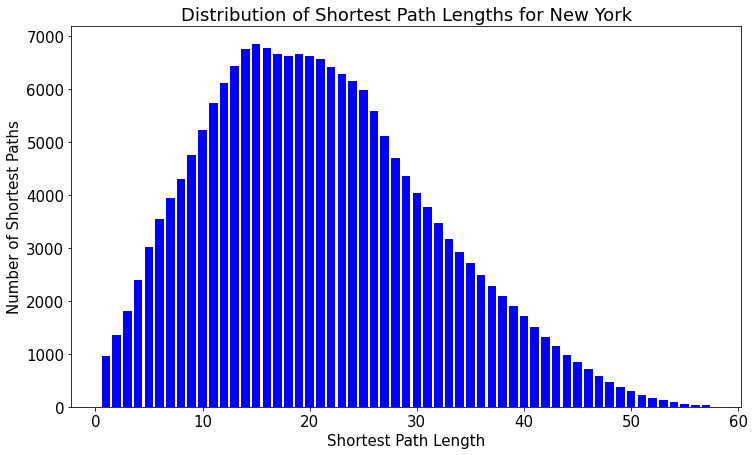

In [16]:
H, bins = np.histogram(num_paths, bins = range(1,maxlength))
fig = plt.figure(figsize=(12,7))
plt.bar(bins[:-1], H, align = 'center', color = 'b')
plt.xlabel("Shortest Path Length")
plt.ylabel("Number of Shortest Paths")
plt.title("Distribution of Shortest Path Lengths for New York")
plt.show()